# Single star

[Jump down to condensed example](#condensed)

#### This notebook is a basic runthrough for a single star from beginning to end

In [1]:
from pysyd import plots
from pysyd.target import Target
from pysyd.utils import Parameters

The `Parameters` object is a container class for default `pySYD` parameters. Since the software is customizable down to the individual star level - we create one large, default dictionary, check for star-specific information and then copy that to the individual star's dictionary. So for n stars, you will have at least n keys in the main parameter dictionary.

## KIC 2309595

### Step 1. Load `pySYD` default parameters

In [2]:
params = Parameters()
print(params)

<Parameters>


### Step 2. Add a target (or any number of targets)

In [3]:
name = '2309595'
params.add_targets(stars=name)

# Both verbose output and displaying of figures are disabled since the software is
# optimized for running many stars, so let's change those!

params.params[name]['show'], params.params[name]['verbose'] = True, True

Now that we have the relevant information we want, let's create a pipeline `Target` object (or star).

### Step 3. Create pipeline `Target` 

In [4]:
star = Target(name, params)
print(star)

<Star 2309595>


The individual star's dictionary is copied to the main params class for this object, so now you only have the single dictionary (you can think of it as a `pop` of the main dictionary, but it makes copies instead of removing). This means we can directly access the defaults without using the star's name as a keyword -- so now we can change whatever we want directly!

In [5]:
print(star.params)

{'path': '/Users/ashleychontos/Research/Code/special/pySYD/dev/results/2309595', 'star': '2309595', 'lower_ex': 100.0, 'smooth_width': 20.0, 'lower_bg': 100.0, 'seed': None, 'show': True, 'save': True, 'test': False, 'verbose': True, 'overwrite': False, 'warnings': False, 'stitch': False, 'gap': 20, 'kep_corr': False, 'oversampling_factor': None, 'estimate': True, 'numax': None, 'force': False, 'dnu': None, 'binning': 0.005, 'bin_mode': 'mean', 'upper_ex': None, 'step': 0.25, 'n_trials': 3, 'ask': False, 'background': True, 'basis': 'tau_sigma', 'box_filter': 1.0, 'fix_wn': False, 'n_laws': None, 'ind_width': 20.0, 'upper_bg': None, 'metric': 'bic', 'n_rms': 20, 'globe': True, 'ex_width': 1.0, 'lower_ps': None, 'upper_ps': None, 'sm_par': None, 'n_peaks': 5, 'smooth_ps': 2.5, 'fft': True, 'threshold': 1.0, 'hey': False, 'cmap': 'binary', 'clip_value': 3.0, 'interp_ech': False, 'notching': False, 'lower_ech': None, 'upper_ech': None, 'npb': 10, 'nox': None, 'noy': '0+0', 'ridges': False

Now we will attempt to load in the target data which will return a boolean that says if it's ok to proceed.

In [6]:
print(star.load_data())


-----------------------------------------------------------
Target: 2309595
-----------------------------------------------------------
# LIGHT CURVE: 41949 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 106123 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.400298 muHz
True


Looks like we've been cleared!

Let's estimate some starting points for the main module.

### Step 3. Estimate parameters

-----------------------------------------------------------
PS binned to 219 datapoints

Numax estimates
---------------
Estimate 1: 631.20 +/- 9.69
S/N: 13.22
Estimate 2: 635.72 +/- 30.78
S/N: 10.07
Estimate 3: 650.06 +/- 85.26
S/N: 7.90
Selecting model 1


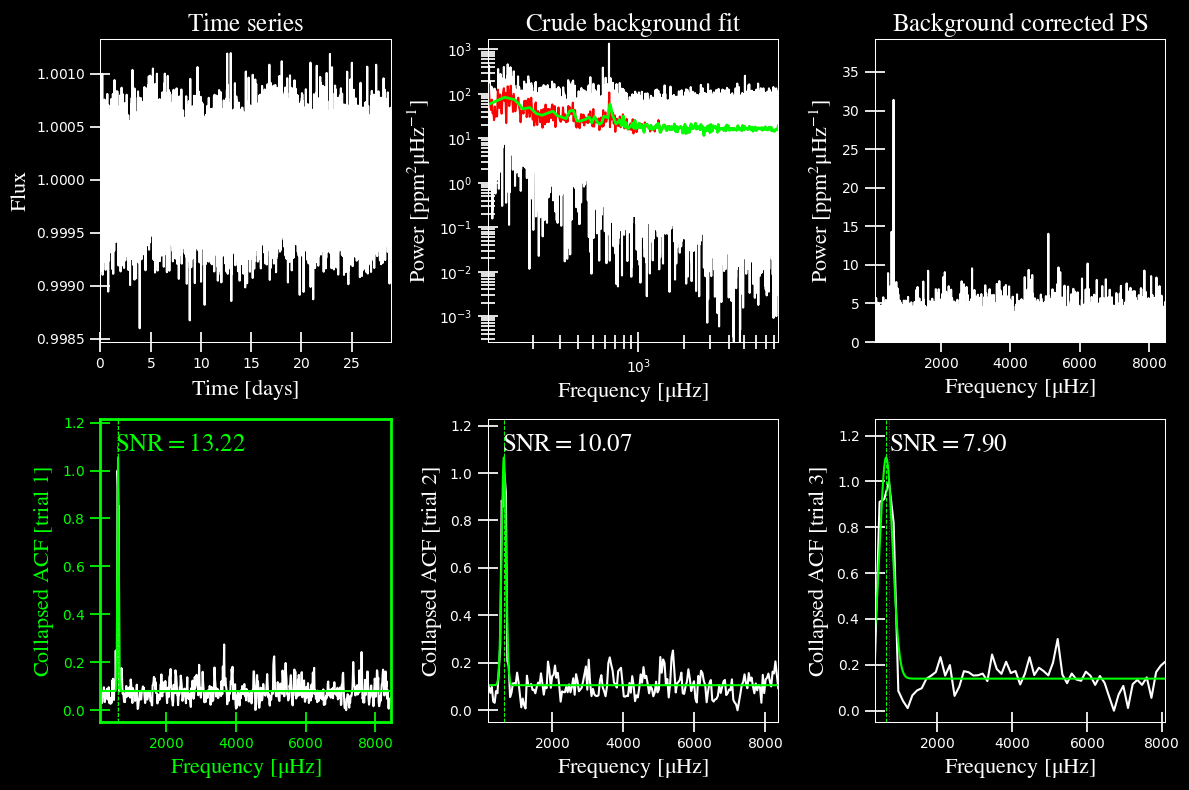

In [7]:
star.estimate_parameters()
plots.plot_estimates(star)

All the trials give consistent answers for $\rm \nu_{max}$ that I also agree with by eye, so I think we can move on to the full fit.

### Step 4. Derive parameters

-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 392 data points

Background model
----------------
Comparing 4 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 18706.87 | AIC = 47.72
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 17662.98 | AIC = 45.05
Model 2: 1 Harvey-like component(s) + white noise fixed
 BIC = 4116.35 | AIC = 10.48
Model 3: 1 Harvey-like component(s) + white noise term
 BIC = 3631.91 | AIC = 9.23
Based on BIC statistic: model 3


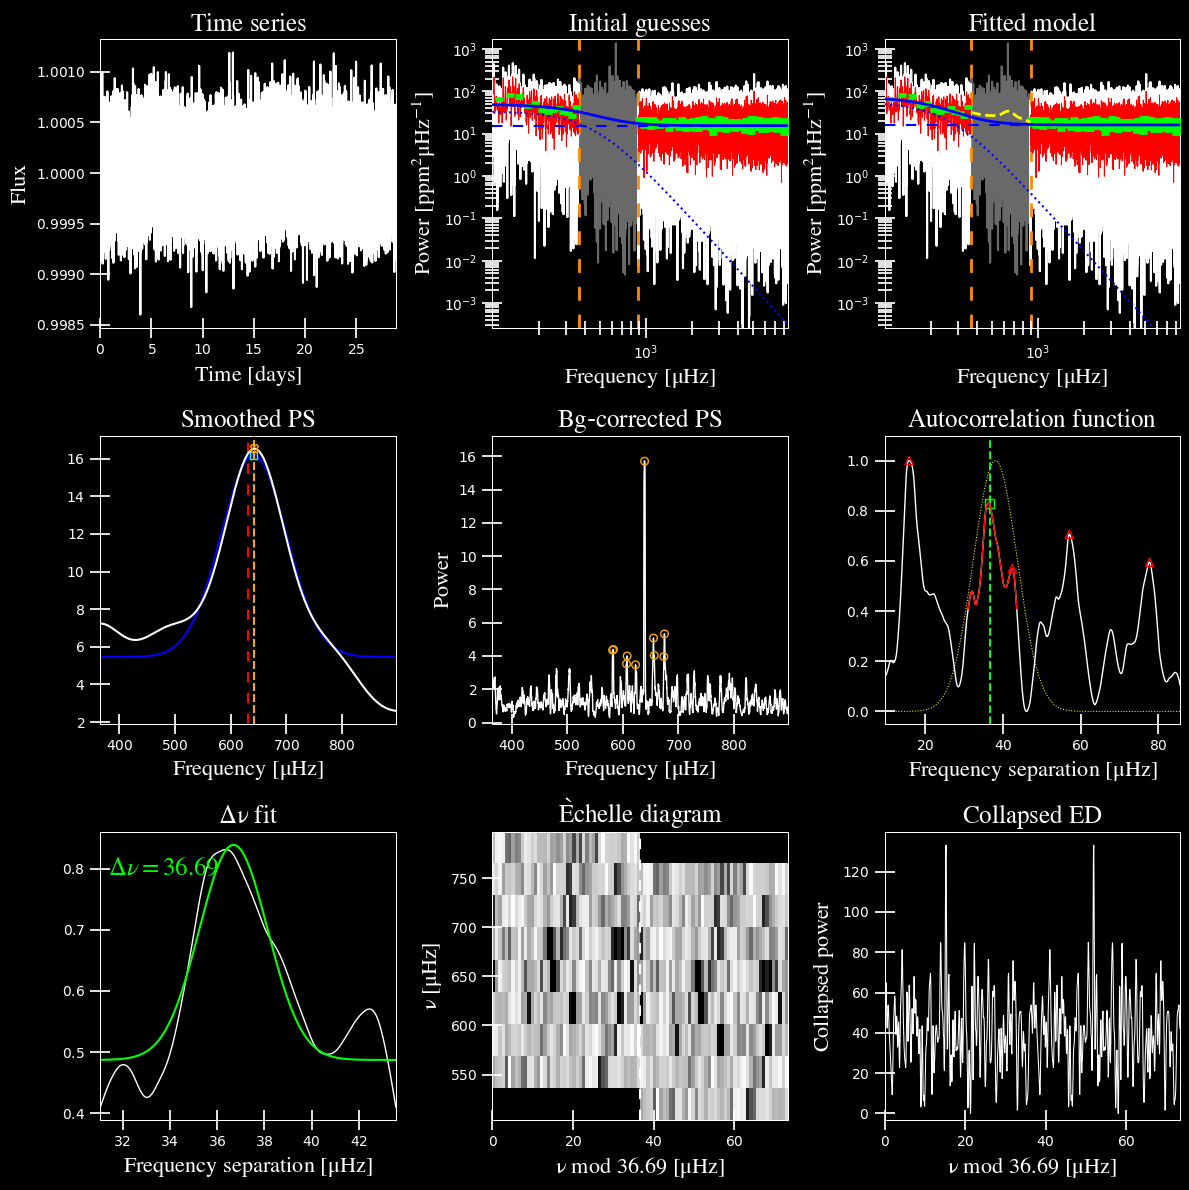

In [8]:
star.derive_parameters()
plots.plot_parameters(star)

In the verbose output, the 'output parameters' have no uncertainties on the derived values. This is because the number of iterations is 1 by default, for a single iteration. You also might've noticed that there are two different estimates for $\rm \nu_{max}$. **For posterity, the `SYD` pipeline also estimated both of these values but traditionally used** $\rm \nu_{max,smooth}$ **within the literature.** ***We recommend that you do the same.***

To estimate uncertainties for these parameters, we'll need to set the number of iterations to something much higher (typically on the order of a hundred or so).

### Step 5. Derive uncertainties

In [9]:
star.params['show'], star.params['mc_iter'] = False, 200
star.process_star()

-----------------------------------------------------------
PS binned to 219 datapoints

Numax estimates
---------------
Estimate 1: 631.20 +/- 9.69
S/N: 13.22
Estimate 2: 635.72 +/- 30.78
S/N: 10.07
Estimate 3: 650.06 +/- 85.26
S/N: 7.90
Selecting model 1
-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 392 data points

Background model
----------------
Comparing 4 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 18706.87 | AIC = 47.72
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 17662.98 | AIC = 45.05
Model 2: 1 Harvey-like component(s) + white noise fixed
 BIC = 4116.35 | AIC = 10.48
Model 3: 1 Harvey-like component(s) + white noise term
 BIC = 3631.91 | AIC = 9.23
Based on BIC statistic: model 3
-----------------------------------------------------------
Sampling routine (using seed=2904822):


100%|███████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.15it/s]


-----------------------------------------------------------
Output parameters
-----------------------------------------------------------
numax_smooth: 642.64 +/- 11.57 muHz
A_smooth: 16.53 +/- 5.34 ppm^2/muHz
numax_gauss: 641.23 +/- 23.20 muHz
A_gauss: 10.73 +/- 4.62 ppm^2/muHz
FWHM: 58.58 +/- 21.93 muHz
dnu: 36.69 +/- 1.58 muHz
tau_1: 605.73 +/- 226.09 s
sigma_1: 155.44 +/- 8.63 ppm
white: 16.11 +/- 0.23 ppm^2/muHz
-----------------------------------------------------------


### Step 6. Peep results

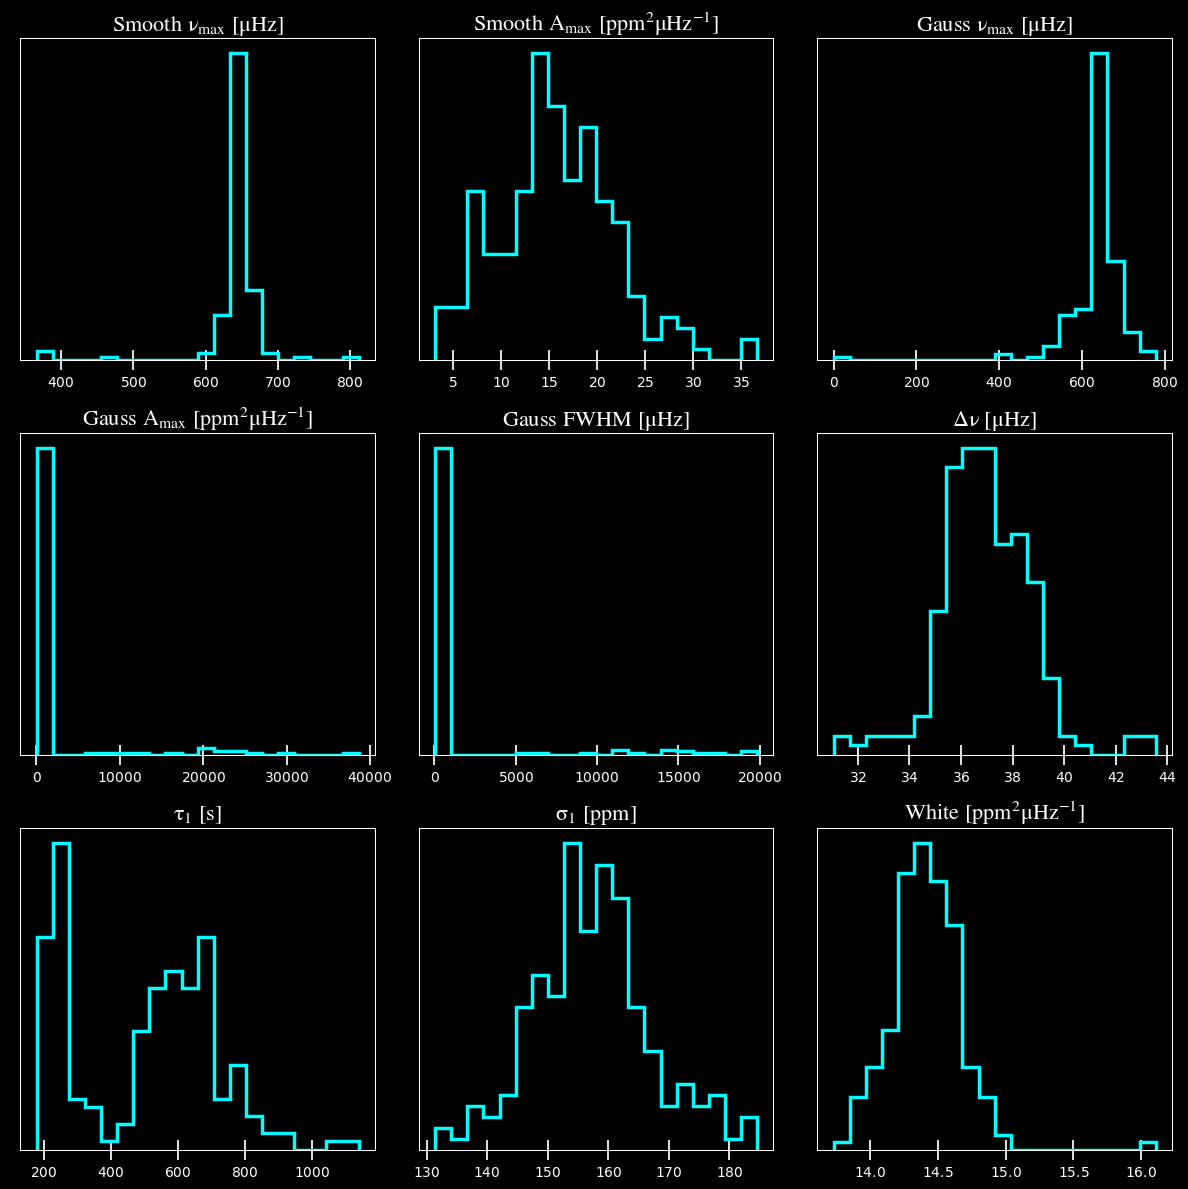

In [10]:
star.params['show'] = True
plots.plot_samples(star)

As you can see, it still liked the same model (good sanity check) and the derived value for $\rm \nu_{max}$ was robust to this and did not change.

So now we have both parameters and uncertainties!

# Condensed version <a id='condensed'></a>

\[ Putting it all together with `star.process_star()` \]

In [13]:
name='2309595'
params = Parameters()
params.add_targets(stars=name)
params.params[name]['verbose'], params.params[name]['mc_iter'] = True, 200
star = Target(name, params)
if star.load_data():
    star.process_star()


-----------------------------------------------------------
Target: 2309595
-----------------------------------------------------------
# LIGHT CURVE: 41949 lines of data read
# Time series cadence: 59 seconds
# POWER SPECTRUM: 106123 lines of data read
# PS oversampled by a factor of 5
# PS resolution: 0.400298 muHz
-----------------------------------------------------------
PS binned to 219 datapoints

Numax estimates
---------------
Estimate 1: 631.20 +/- 9.69
S/N: 13.22
Estimate 2: 635.72 +/- 30.78
S/N: 10.07
Estimate 3: 650.06 +/- 85.26
S/N: 7.90
Selecting model 1
-----------------------------------------------------------
GLOBAL FIT
-----------------------------------------------------------
PS binned to 392 data points

Background model
----------------
Comparing 4 different models:
Model 0: 0 Harvey-like component(s) + white noise fixed
 BIC = 18706.87 | AIC = 47.72
Model 1: 0 Harvey-like component(s) + white noise term
 BIC = 17662.98 | AIC = 45.05
Model 2: 1 Harvey-like comp

100%|███████████████████████████████████████████████████| 200/200 [00:17<00:00, 11.52it/s]


-----------------------------------------------------------
Output parameters
-----------------------------------------------------------
numax_smooth: 642.64 +/- 11.57 muHz
A_smooth: 16.53 +/- 5.34 ppm^2/muHz
numax_gauss: 641.23 +/- 23.20 muHz
A_gauss: 10.73 +/- 4.62 ppm^2/muHz
FWHM: 58.58 +/- 21.93 muHz
dnu: 36.69 +/- 1.58 muHz
tau_1: 605.73 +/- 226.09 s
sigma_1: 155.44 +/- 8.63 ppm
white: 16.11 +/- 0.23 ppm^2/muHz
-----------------------------------------------------------
